# 5. Algorithm Discussion

In [21]:
import project1 as p1
import utils
import numpy as np

In [22]:
toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

In [23]:
toy_features

array([[ 1.76  ,  0.4   ],
       [ 0.979 ,  2.24  ],
       [ 1.87  , -0.977 ],
       [ 0.95  , -0.151 ],
       [-0.103 ,  0.411 ],
       [ 0.144 ,  1.45  ],
       [ 0.761 ,  0.122 ],
       [ 0.444 ,  0.334 ],
       [ 1.49  , -0.205 ],
       [ 0.313 , -0.854 ],
       [-2.55  ,  0.654 ],
       [ 0.864 , -0.742 ],
       [ 2.27  , -1.45  ],
       [ 0.0458, -0.187 ],
       [ 1.53  ,  1.47  ],
       [ 0.155 ,  0.378 ],
       [-0.8878, -1.9808],
       [-0.348 ,  0.156 ],
       [ 1.23  ,  1.2   ],
       [-0.3873, -0.3023],
       [-1.0486, -1.42  ],
       [-1.71  ,  1.95  ],
       [-0.5097, -0.4381],
       [-1.25  ,  0.777 ],
       [-1.6139, -0.2127],
       [-0.895 ,  0.387 ],
       [-0.5108, -1.1806],
       [-0.0282,  0.428 ],
       [ 0.0665,  0.302 ],
       [-0.6343, -0.3627],
       [-0.6725, -0.3596],
       [-0.8131, -1.7263],
       [ 0.177 , -0.402 ],
       [-1.63  ,  0.463 ],
       [-0.907 ,  0.0519],
       [ 0.729 ,  0.129 ],
       [ 1.14  , -1.23  ],
 

In [38]:
def get_order(n_samples):
    try:
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices


def hinge_loss_single(feature_vector, label, theta, theta_0):

    # Your code here
    
    z = label*(np.sum(np.multiply(feature_vector,theta))+theta_0)
    ret = max(0,1-z) 
    return ret
    raise NotImplementedError


def hinge_loss_full(feature_matrix, labels, theta, theta_0):
    return np.maximum(0, 1 - labels*(np.sum(feature_matrix * theta, axis = 1) + theta_0)).mean()

    # Your code here
    #raise NotImplementedError


def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    X=feature_vector
    Y=label
    w=current_theta
    w0=current_theta_0


    if (np.dot(X, w)+w0)*Y <= 0:
                w = w + X*Y
                w0 = w0 + Y
              

    return (w,w0)


    # Your code here
    #raise NotImplementedError


def perceptron(feature_matrix, labels, T):

    
    # Your code here
    X=feature_matrix
    Y=labels
    w = np.zeros(len(X[0]))
    
    #w = np.transpose([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
    w0 = 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
             w,w0=perceptron_single_step_update(X[i,:], Y[i], w, w0)
    return (w,w0)



def average_perceptron(feature_matrix, labels, T):

    X=feature_matrix
    Y=labels
    w = np.zeros(len(X[0]))
    #w = np.transpose([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
    w0 = 0
    wnew= np.zeros(len(X[0]))
    w0new=0
    counter=0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            w,w0=perceptron_single_step_update(X[i,:], Y[i], w, w0)
            wnew= wnew + w
            w0new= w0new + w0
            counter= counter + 1           
    return (wnew/counter,w0new/counter)


def pegasos_single_step_update(
        feature_vector,
        label,
        L,
        eta,
        current_theta,
        current_theta_0):

    
    X=feature_vector
    Y=label
    w=current_theta
    w0=current_theta_0


    if (np.dot(X, w)+w0)*Y <= 1:
                w = w*(1-L*eta) + X*Y*eta
                w0 = w0 + Y*eta
    else:
                w = w*(1-L*eta)
                w0 = w0
    return (w,w0)
              
    #raise NotImplementedError


def pegasos(feature_matrix, labels, T, L):
    X=feature_matrix
    Y=labels
    w = np.zeros(len(X[0]))
    w0 = 0
    counter= 0
    (nvectors, dimensions) = feature_matrix.shape
    for t in range(T):
        #for i in get_order(feature_matrix.shape[0]):
        #for i in range(feature_matrix.shape[0]):
        for i in get_order(nvectors):        
            counter=counter+1
            eta = 1/np.sqrt(counter)
            #w,w0=pegasos_single_step_update(X[i,:], Y[i],L, eta, w, w0)
            w,w0=pegasos_single_step_update(X[i,:], Y[i],L, eta, w, w0)
              
        #for i, x in enumerate(X):
               # if (np.dot(X[i],w)*Y[i]) <= 0:
               #w = w + X[i]*Y[i]
               #w0 = w0 + Y[i]
#def pegasos_single_step_update(feature_vector,label,L,eta,current_theta,current_theta_0):
    return (w,w0)    

In [40]:
T = 10
L = 0.2

thetas_perceptron = perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = pegasos(toy_features, toy_labels, T, L)

theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0


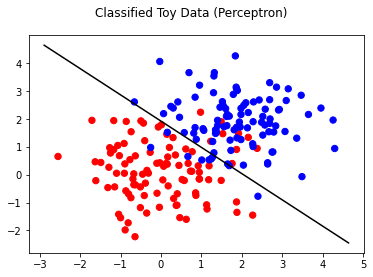

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373


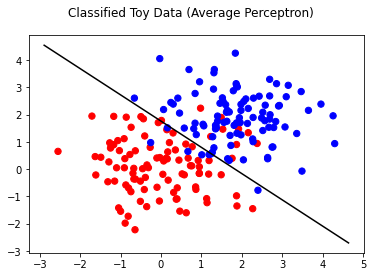

theta for Pegasos is 0.7346463119064065, 0.6300224592973831
theta_0 for Pegasos is -1.2195071848898564


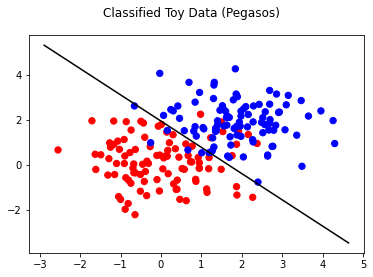

In [41]:

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

Since you have implemented three different learning algorithm for linear classifier, it is interesting to investigate which algorithm would actually converge. Please run it with a larger number of iterations  to see whether the algorithm would visually converge. You may also check whether the parameter in your theta converge in the first decimal place. Achieving convergence in longer decimal requires longer iterations, but the conclusion should be the same.

In [44]:
T = 10000
L = 0.2

thetas_perceptron = perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = pegasos(toy_features, toy_labels, T, L)

theta for Perceptron is 2.710799999991158, 4.748199999999745
theta_0 for Perceptron is -8.0


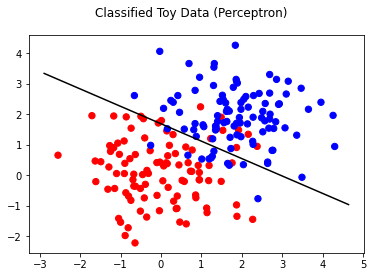

theta for Average Perceptron is 3.8615468785446034, 3.898118649199404
theta_0 for Average Perceptron is -7.0714955


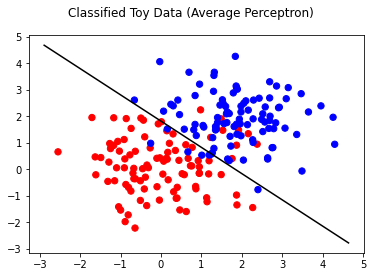

theta for Pegasos is 0.6499940747976393, 0.6036927763627459
theta_0 for Pegasos is -1.2368593909880747


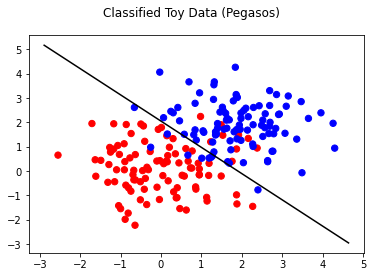

In [45]:
plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)